# Five-classes sentiment analysis using Naive Bayes (Categorical Classification approach)

In [ ]:
# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

## Dataset

In [ ]:
import pandas as pd

In [ ]:
reviews_dataset = pd.read_csv('reviews_preprocessed.csv')

In [ ]:
reviews_dataset['content'] = reviews_dataset['content'].astype(str)

In [ ]:
print(reviews_dataset.isna().sum())
len(reviews_dataset)

content          0
score            0
thumbsUpCount    0
appId            0
review_len       0
word_count       0
polarity         0
dtype: int64


11879

In [ ]:
#reviews_dataset = reviews_dataset[reviews_dataset["word_count"]>2]
print("1 star rating count: " ,len(reviews_dataset[reviews_dataset["score"] == 0]),"\n")
print("2 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 1]),"\n")
print("3 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 2]),"\n")
print("4 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 3]),"\n")
print("5 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 4]),"\n")

1 star rating count:  2336 

2 stars rating count:  2337 

3 stars rating count:  2391 

4 stars rating count:  2391 

5 stars rating count:  2424 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


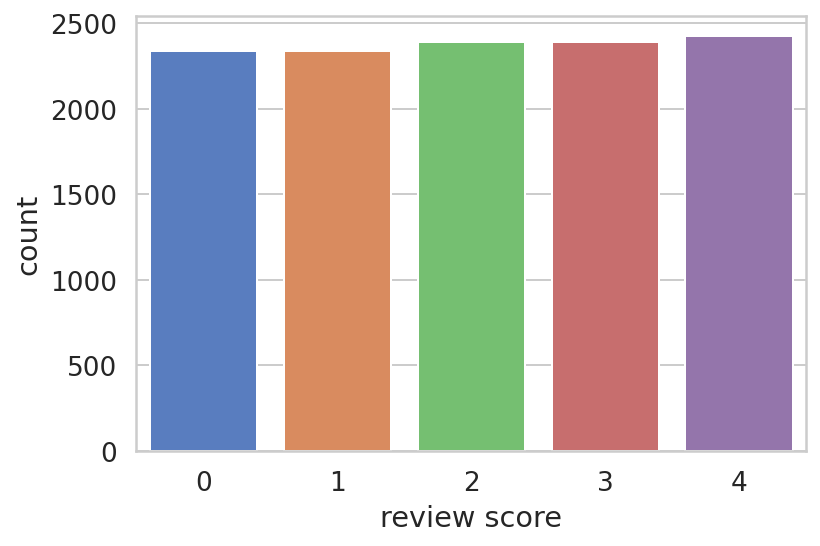

In [ ]:
sns.countplot(reviews_dataset.score)
plt.xlabel('review score');

In [ ]:
reviews_dataset.head()

,content,score,thumbsUpCount,appId,review_len,word_count,polarity
0,user interface horrible way task show difficul...,0,145,com.anydo,242,40,0.031481
1,keep lose event save enter recur event might s...,0,2,com.anydo,128,22,0.000000
2,adhd want try app help remember chore around h...,0,0,com.anydo,139,22,0.500000
3,point pay premium colour tag dont even show ca...,0,3,com.anydo,123,21,0.000000
4,installed look around instal clunky feel intui...,0,1,com.anydo,136,20,0.100000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split into training and testing data
x = reviews_dataset['content']
y = reviews_dataset['score']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.16, random_state=42)

## The model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
params={ 
        'count_vect__max_df': [0.2,0.4,0.6,0.8,1.0],
        'count_vect__min_df': [0.0,0.02,0.05,0.1,0.2],
        'count_vect__ngram_range':[(1,1),(1, 2)],
        'clf__alpha':[.01,.5,1.0],
        'clf__fit_prior':[True,False]
       }

classifier_pipline = Pipeline(
                      [
                       ('count_vect', CountVectorizer()), 
# if slow try to count the number of features extracted by count vectorizer and do feature selection
#                      ('reducer', SelectKBest(chi2, k=3000)),
                       ('clf', MultinomialNB())
                      ]
                    )

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(classifier_pipline, cv=5, n_jobs=-1, param_grid=params ,scoring='accuracy', verbose = 3, refit = True)
grid

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
grid.fit(x, y)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 11.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'Naive_Bayes.sav'
pickle.dump(grid, open(filename, 'wb'))

In [ ]:
# some time later...
filename = 'Naive_Bayes.sav'
# load the model from disk
grid = pickle.load(open(filename, 'rb'))
result = grid.score(x_test, y_test)
print(result)

0.46291425565491845


## Accuracy

In [ ]:
best_model= grid.best_estimator_
best_model

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.4,
                                 max_features=None, min_df=0.0,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))],
         verbose=False)

In [ ]:
best_model["clf"].class_count_

array([1962., 1963., 2008., 2009., 2036.])

In [ ]:
best_model["clf"].classes_

array([0, 1, 2, 3, 4])

In [ ]:
grid.best_score_

0.45760794772502394

In [ ]:
grid.best_params_

{'clf__alpha': 1.0,
 'clf__fit_prior': False,
 'count_vect__max_df': 0.4,
 'count_vect__min_df': 0.0,
 'count_vect__ngram_range': (1, 1)}

In [ ]:
score = grid.score(x_test, y_test)
score

0.46291425565491845

In [ ]:
y_pred = grid.predict(x_test)
y_pred

array([4, 3, 0, ..., 0, 1, 4])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.46291425565491845

In [ ]:
y_pred_proba = grid.predict_proba(x_test)
print(y_pred_proba)

[[2.09084773e-09 1.64450809e-07 4.62073345e-06 2.23946389e-03
  9.97755749e-01]
 [1.59780115e-03 2.95520985e-01 2.18122480e-01 4.84348661e-01
  4.10072388e-04]
 [4.97618974e-01 1.56008174e-01 3.45092197e-01 1.27077562e-03
  9.87999896e-06]
 ...
 [7.15237411e-01 2.49230366e-01 3.22562785e-02 1.81856268e-03
  1.45738173e-03]
 [1.16546805e-01 3.04080613e-01 2.74607988e-01 2.49279504e-01
  5.54850912e-02]
 [1.60785512e-05 4.35466619e-05 4.00918463e-04 2.62763826e-02
  9.73263074e-01]]


In [ ]:
#grid.predict(vec.transform(['Love this app simply awesome!']))
grid.predict(['Love this app simply awesome!'])

array([4])

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-with-naive-bayes-classifier/

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# https://www.dataquest.io/blog/naive-bayes-tutorial/
# https://medium.com/analytics-vidhya/naive-bayes-classifier-for-text-classification-556fabaf252b

## Confusion Matrix

In [ ]:
#from sklearn.model_selection import cross_val_predict

In [ ]:
#y_train_pred = cross_val_predict(grid, x, y, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="f", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');


In [ ]:
class_names = ['strongly_neg','neg','neutral','pos','strongly_pos']

In [ ]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[218,  73,  52,  19,  12],
       [104, 123,  94,  33,  20],
       [ 60,  95,  85, 111,  32],
       [ 15,  27,  57, 171, 112],
       [  7,  15,  18,  65, 283]])

In [ ]:
df_cm = pd.DataFrame(conf_mx, index=class_names, columns=class_names)

In [ ]:
import numpy as np

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
print(row_sums)
norm_conf_mx = conf_mx / row_sums

[[374]
 [374]
 [383]
 [382]
 [388]]


In [ ]:
norm_conf_mx

array([[0.5828877 , 0.19518717, 0.13903743, 0.05080214, 0.03208556],
       [0.27807487, 0.32887701, 0.2513369 , 0.08823529, 0.05347594],
       [0.15665796, 0.24804178, 0.22193211, 0.28981723, 0.08355091],
       [0.03926702, 0.07068063, 0.14921466, 0.44764398, 0.29319372],
       [0.01804124, 0.03865979, 0.04639175, 0.16752577, 0.72938144]])

In [ ]:
df_norm_cm = pd.DataFrame(norm_conf_mx, index=class_names, columns=class_names)

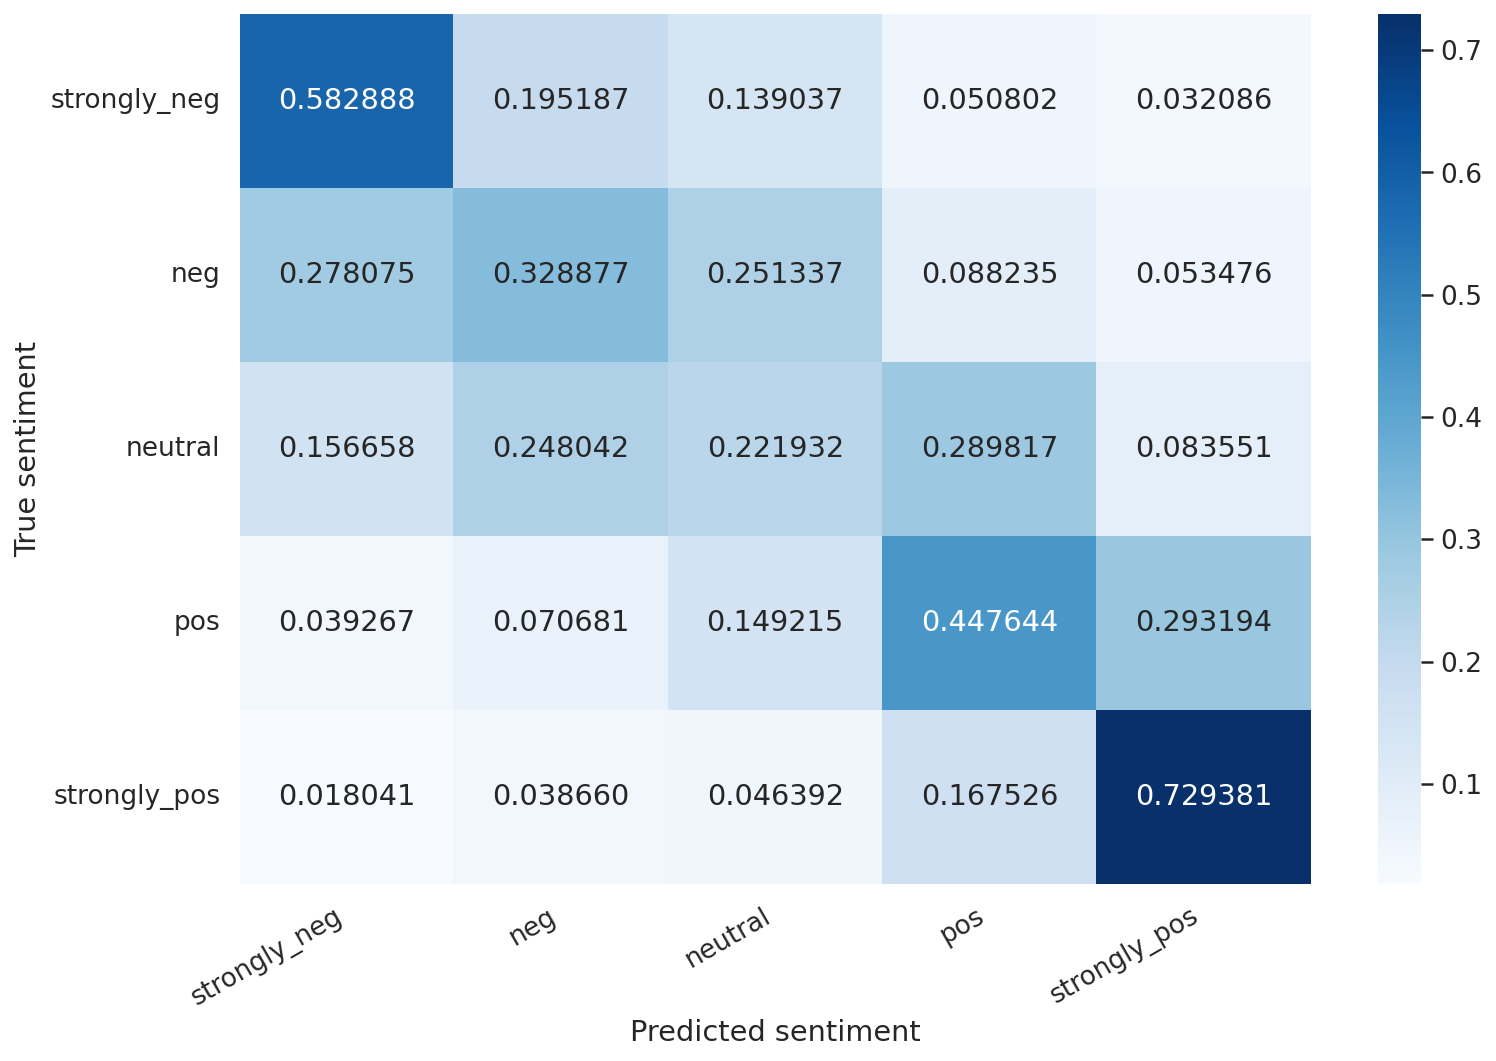

In [ ]:
show_confusion_matrix(df_norm_cm)

In [ ]:
import numpy as np

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)

In [ ]:
df_norm_cm = pd.DataFrame(norm_conf_mx, index=class_names, columns=class_names)

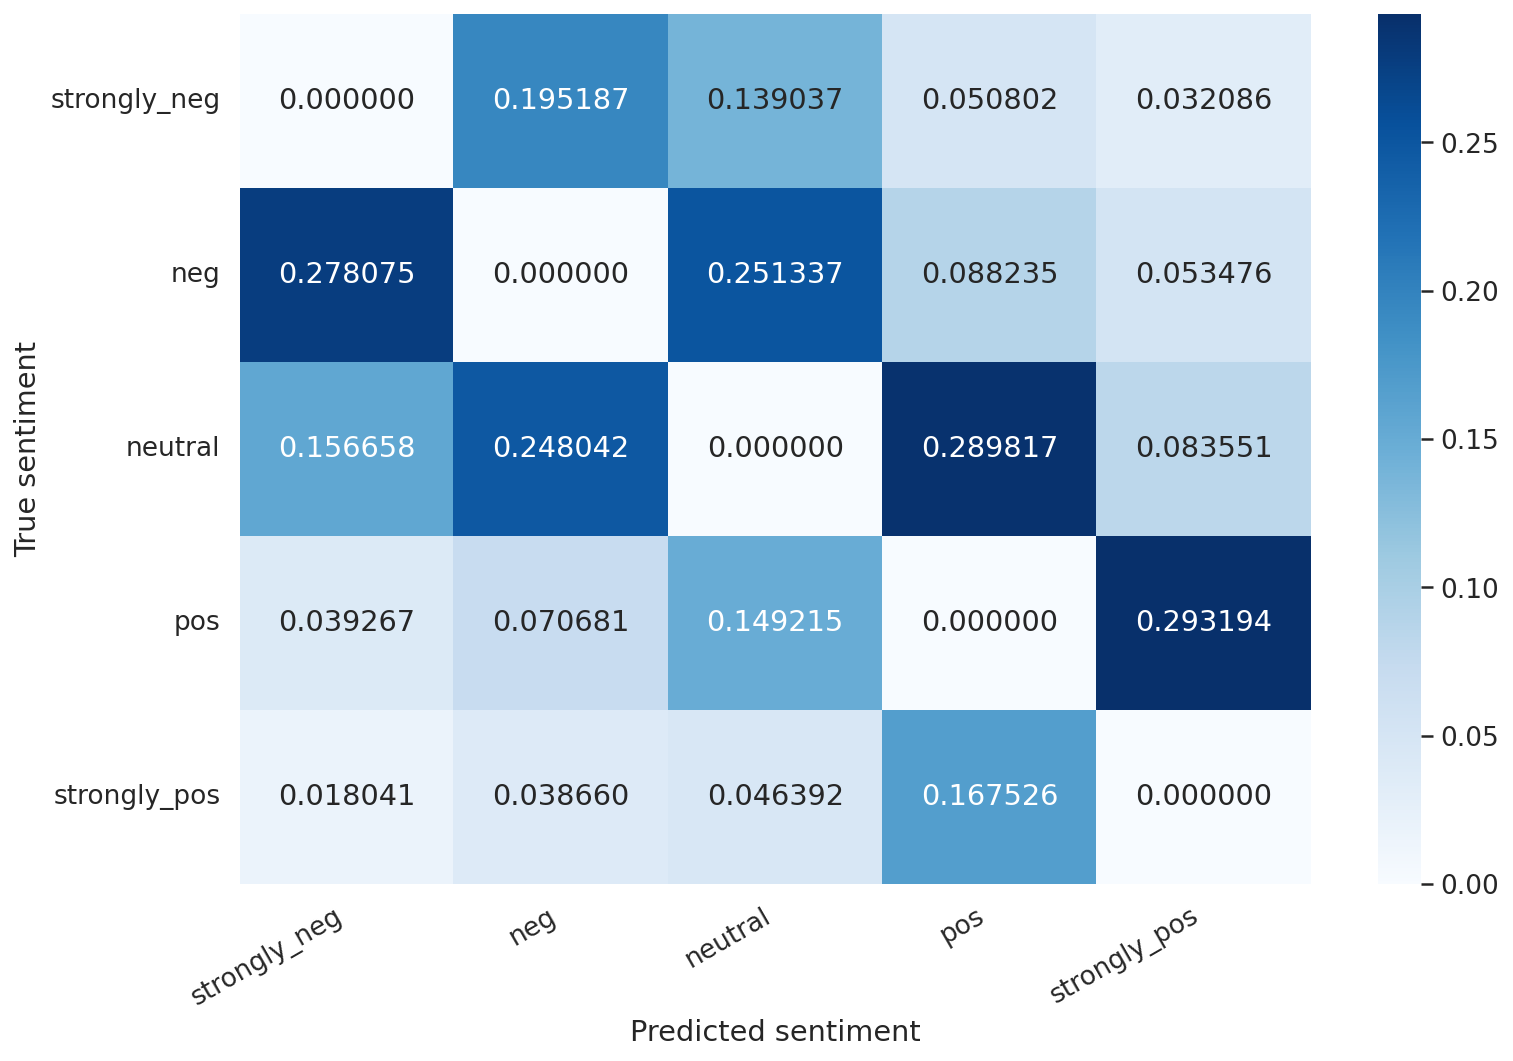

In [ ]:
show_confusion_matrix(df_norm_cm)

## Precison / Recall

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
# Use label_binarize to be multi-label like settings
y_test_mult = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
print(y_test_mult)
print(y_pred_proba)

n_classes = y_test_mult.shape[1]
n_classes

[[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]]
[[2.09084773e-09 1.64450809e-07 4.62073345e-06 2.23946389e-03
  9.97755749e-01]
 [1.59780115e-03 2.95520985e-01 2.18122480e-01 4.84348661e-01
  4.10072388e-04]
 [4.97618974e-01 1.56008174e-01 3.45092197e-01 1.27077562e-03
  9.87999896e-06]
 ...
 [7.15237411e-01 2.49230366e-01 3.22562785e-02 1.81856268e-03
  1.45738173e-03]
 [1.16546805e-01 3.04080613e-01 2.74607988e-01 2.49279504e-01
  5.54850912e-02]
 [1.60785512e-05 4.35466619e-05 4.00918463e-04 2.62763826e-02
  9.73263074e-01]]


5

In [ ]:
print(len(y_test_mult))
print(len(y_pred_proba))

1901
1901


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_mult[:, i],
                                                        y_pred_proba[:, i])
    
    curr_precision = precision[i]
    curr_recall = recall[i]

    precision[i] = precision[i][curr_precision+curr_recall > 0.0]
    recall[i] = recall[i][curr_precision+curr_recall > 0.0]

    average_precision[i] = average_precision_score(y_test_mult[:, i], y_pred_proba[:, i])

In [ ]:
# A "macro-average": Averaging over classes
# ====> Cannot do macro-average by the below approach because:
# len(precision[i]) depend on i (the unique probas in column i)
# the thresholds that based on it the precision & recall are calculated is not the same at the corresponding indices
#precision_sum = precision[0] + precision[1] + precision[2] + precision[3] + precision[4]
#precision["macro"] = precision_sum / 5
#recall_sum = recall[0] + recall[1] + recall[2] + recall[3] + recall[4]
#recall["macro"] = recall_sum / 5

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_mult.ravel(),
    y_pred_proba.ravel())


# compute F1 score
f1_score = dict()
# for each class
for i in range(n_classes):
  f1_score[i] = 2*((precision[i]*recall[i])/(precision[i]+recall[i]))

f1_score["micro"] = 2*((precision["micro"]*recall["micro"])/(precision["micro"]+recall["micro"]))

In [ ]:
average_precision["micro"] = average_precision_score(y_test_mult, y_pred_proba,
                                                     average="micro")
average_precision["macro"] = average_precision_score(y_test_mult, y_pred_proba,
                                                     average="macro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
print('Average precision score, macro-averaged over all classes: {0:0.2f}'
      .format(average_precision["macro"]))

Average precision score, micro-averaged over all classes: 0.49
Average precision score, macro-averaged over all classes: 0.47


Plot the micro-averaged Precision-Recall curve

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.49')

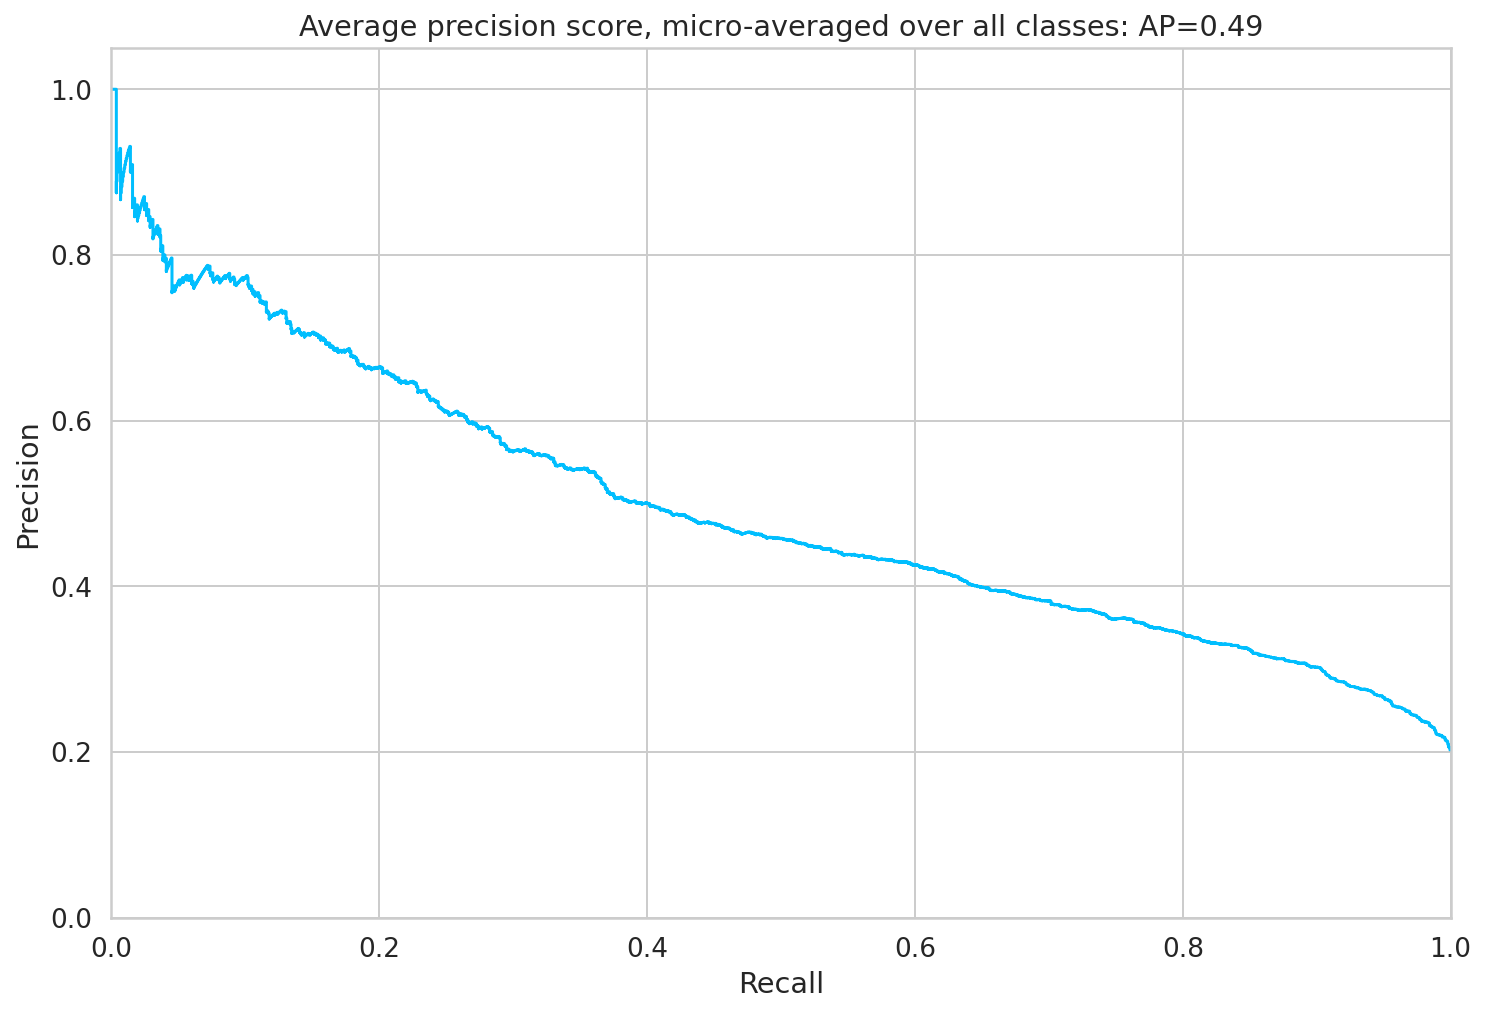

In [ ]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

Plot Precision-Recall curve for each class and iso-f1 curves

In [ ]:
from itertools import cycle

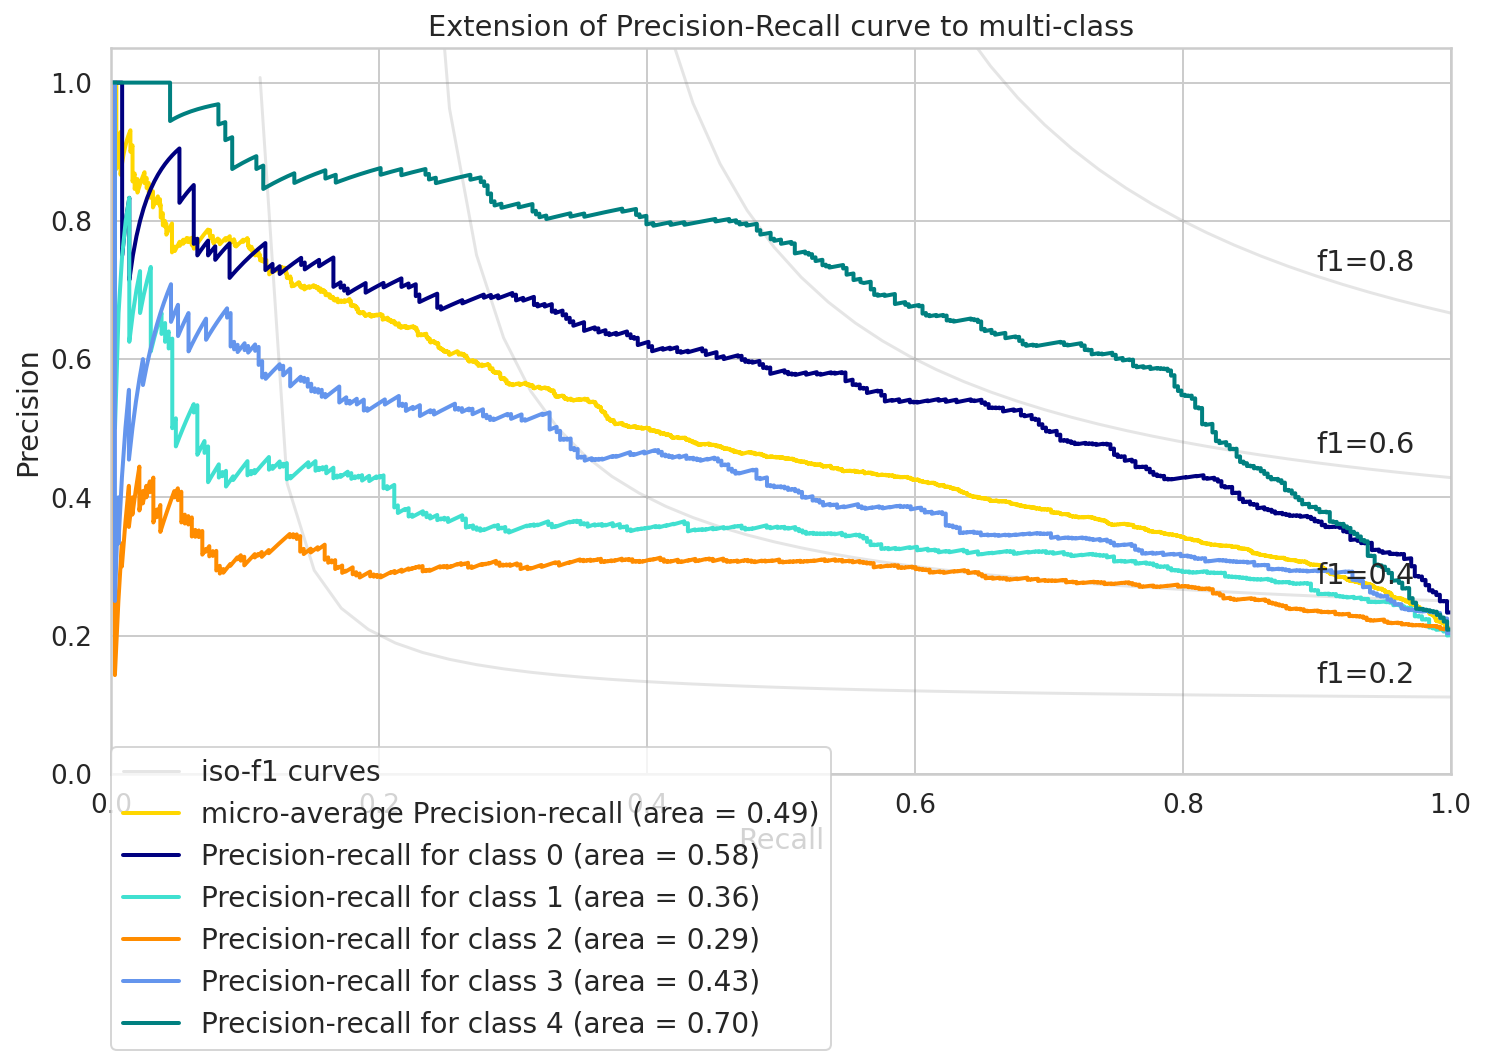

In [ ]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(12, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()
